In [1]:
import numpy as np
import matplotlib.pyplot as plt
import iop_ext as iop # provides radius in earth radii
import lf14 as lf

In [12]:
# Define constants
# SUB NEPTUNE OF CHOICE: TOI-836B

# basic constants
au = 1.49598e11 # AU to m (astronomical unit)
yr = 3600 * 24 * 365 #year conversion rate to seconds (s/yr)
G = 6.67e-11 
Mearth = 5.97219e24 # kg
Rearth = 6.371e6 # m 
a_o = .5 # slope at which Lhe decreases over time
Lsun = 3.846e26 # luminosity in watts of sun
Msun = 1.99e30 # mass kg of sun

# Exoplanet constants
cmf = .325
mp_o = 4.53*Mearth
wmf_o = .5 # 50% water planet
Lstar = .5*Lsun # Luminsotiy in watts of host star
Mstar = .665*Msun # mass kg of host star
Lsat = (10**-3.5)*(Lsun)*(Mstar/Msun)
tsat = 1e8*yr
Teq = 871 # Kelvin
a = .0422*au # semi majoral axis (x*au)


#for planet specific data, check NASA exoplanet archive and input manually

In [3]:
# Initialize variables

mp=mp_o
t= 1e6*yr

In [4]:
# Define functions

#wmf(mp, mp_o, wmf_o)
def wmf_func(mp, mp_o, wmf_o): #derived in notes
    return (1-((mp_o-(wmf_o*mp_o))/mp))

#Lhe(t)
def Lhe_func(t):
    if (t<tsat):
        return Lsat
    else:
        return Lsat*((t/tsat)**(-1-a_o))

#mdot(mp,rp,Lhe,a...etc?) units: earth masses per billion years
def mdot_func(mp,rp,a,t):
    Lhe=Lhe_func(t)
    eta=eta_func(mp,rp)
    return eta*((rp**3)*Lhe)/(4*(a**2)*G*mp)

#eta(mp,rp)
def eta_func(mp,rp):
    return (45*rp)/(4*G*mp)

#rp(cmf,wmf,Teq,mp) in EARTH units
def rp_func(cmf,wmf,Teq,mp):
    return (iop.radius_iop(cmf,wmf,Teq,mp/Mearth))*Rearth
    

In [5]:
#test functions

print(wmf_func(mp,mp_o,wmf_o))
print(rp_func(cmf,wmf_func(mp,mp_o,wmf_o),Teq,mp))
print(Lhe_func(t))

rp=rp_func(cmf,wmf_func(mp,mp_o,wmf_o),Teq,mp)
mdot=mdot_func(mp,rp,a,t)
print(mdot_func(mp,rp,a,t))
print((mdot/Mearth)*1e9*yr)

0.5
15281181.396867836
8.087809720870046e+22
95.57832166674274
5.046989382592313e-07


## Evolution of Planet ##

In [41]:
# Evolution of planet

# initialize rest of variables

t= 1e6*yr
iteration_no=0
mdot_n=mdot_func(mp,rp,a,t)
mp_n=mp
rp_n=rp
maxt = 5e9*yr
wmf_n=wmf_o
del_t=1e6*yr

error_code = iop.error_iop(cmf,wmf_o,Teq,mp/Mearth)

# initialize arrays to be appended to

t_array=np.array([])
mdot_array=np.array([])
mp_array=np.array([])
r_array=np.array([])
wmf_array=np.array([])

t_array=np.append(t_array,t)
mdot_array=np.append(mdot_array,mdot_n)
mp_array=np.append(mp_array,mp_n)
r_array=np.append(r_array,rp_n)
wmf_array=np.append(wmf_array,wmf_n)
# commence loop

while True:
    if t>=maxt:
        print('simulation complete')
        break
    iteration_no+=1
    mp_n-=mdot_n*del_t
    wmf_n=wmf_func(mp_n,mp_o,wmf_n)
    rp_n=rp_func(cmf,wmf_n,Teq,mp_n)
    t+=1e6*yr
    mdot_n=mdot_func(mp_n,rp_n,a,t)
    error_code_n = iop.error_iop(cmf,wmf_n,Teq,mp_n/Mearth)
    
    if wmf_n<=0:
        print("Stopped because WMF became less/equal to 0")
        break
    if mdot_n<=0:
        print("Stopped because Mdot became less/equal to 0")
        break
    elif error_code == 2:
        print('parameters resulted in inconsistent data; simulation stopped')
        break

    if iteration_no%10==0:
        t_array=np.append(t_array,t)
        mdot_array=np.append(mdot_array,mdot_n)
        mp_array=np.append(mp_array,mp_n)
        r_array=np.append(r_array,rp_n)
        wmf_array=np.append(wmf_array,wmf_n)

 #   print(f"Iteration Number {iteration_no:.0f}: t: {(t/(1e9*yr)):.3f} Gyr, mdot: {((mdot_n*1e9*yr)/Mearth):.10e} Me/Gyr, mp: {(mp_n/Mearth):.9f} Me, rp:{(rp_n/Rearth):f} Re, wmf:{wmf_n:.5f}; error = {error_code_n:.0f} ")
    
    if iteration_no==10000:
        print("stopped just cuz")
        break


simulation complete


In [42]:
#print(f"{mp_n:e}")
#print(mdot_n)
#print(f"{mp_n-mdot_n:e}")
print(len(mp_array))

500


## Plots of Evolution ##

Text(0.5, 1.0, 'M v t: Evolution of TOI-836b')

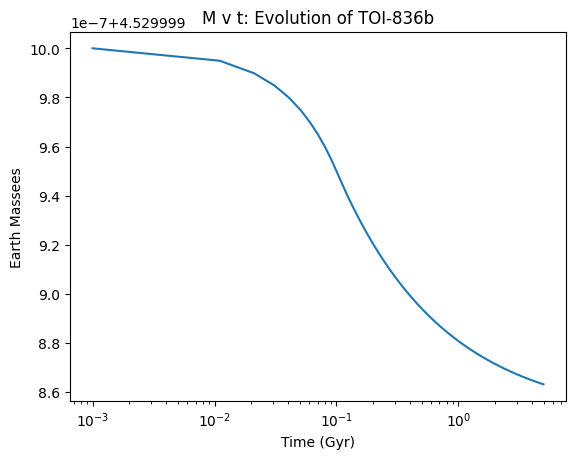

In [43]:
# mass vs t 

plt.plot(t_array/(1e6*yr),mp_array/Mearth)
plt.xscale('log')
plt.xlabel('Time (Myr)')
plt.ylabel('Earth Massees')

plt.title('M v t: Evolution of TOI-836b')

Text(0.5, 1.0, 'R v T: Evolution of TOI-836b')

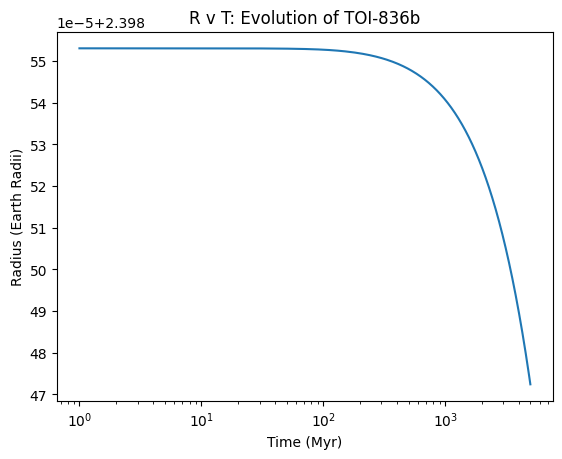

In [47]:
#radius v t

plt.plot(t_array/(1e6*yr),r_array/Rearth)
plt.xscale('log')
plt.xlabel('Time (Myr)')
plt.ylabel('Radius (Earth Radii)')

plt.title('R v T: Evolution of TOI-836b')

Text(0.5, 1.0, 'WMF v T: Evolution of TOI-836b')

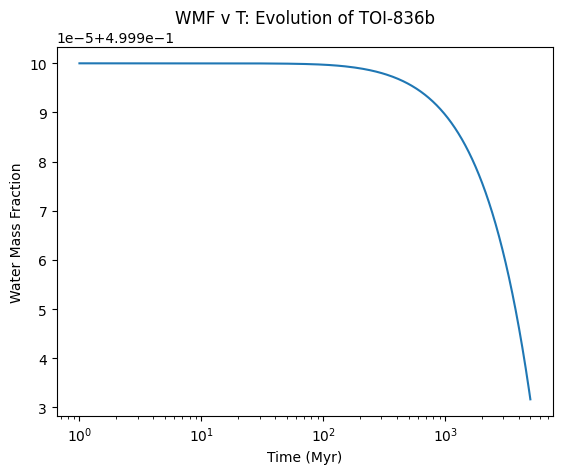

In [48]:
#wmf v t
plt.plot(t_array/(1e6*yr),wmf_array)
plt.xscale('log')
plt.xlabel('Time (Myr)')
plt.ylabel('Water Mass Fraction')

plt.title('WMF v T: Evolution of TOI-836b')

In [50]:
print(wmf_array)

[0.5        0.5        0.49999999 0.49999997 0.49999995 0.49999993
 0.4999999  0.49999986 0.49999982 0.49999977 0.49999972 0.49999966
 0.4999996  0.49999953 0.49999946 0.49999938 0.49999931 0.49999923
 0.49999914 0.49999906 0.49999897 0.49999888 0.49999879 0.4999987
 0.4999986  0.49999851 0.49999841 0.49999831 0.49999821 0.49999811
 0.49999801 0.49999791 0.4999978  0.4999977  0.49999759 0.49999748
 0.49999738 0.49999727 0.49999716 0.49999705 0.49999694 0.49999682
 0.49999671 0.4999966  0.49999649 0.49999637 0.49999626 0.49999614
 0.49999603 0.49999591 0.49999579 0.49999568 0.49999556 0.49999544
 0.49999532 0.4999952  0.49999508 0.49999496 0.49999484 0.49999472
 0.4999946  0.49999448 0.49999436 0.49999423 0.49999411 0.49999399
 0.49999387 0.49999374 0.49999362 0.49999349 0.49999337 0.49999324
 0.49999312 0.49999299 0.49999287 0.49999274 0.49999261 0.49999249
 0.49999236 0.49999223 0.49999211 0.49999198 0.49999185 0.49999172
 0.49999159 0.49999147 0.49999134 0.49999121 0.49999108 0.49999